<a href="https://www.kaggle.com/code/jatinchhabra21/twitter-sentiment-analysis?scriptVersionId=111707401" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
'''
Change the path of file according to your local machine.
'''
data = pd.read_csv("../input/sentiment-data/data.csv")

In [3]:
data.head()

,text,sentiment
0,@angelemotion yayyy for new videos by amazing ...,happiness
1,Surgery when I wake up,neutral
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise
3,Just look @ this hellacious desk...good grief ...,hate
4,@ModelTheany tee we beefin....what was u supp...,surprise


In [4]:
import re
import string
from nltk import WordNetLemmatizer
from textblob import TextBlob

In [5]:
def clean_data(text):
    
    '''
    clean_data(str):
    argument: takes one string argument
    return-type: string
    
    Cleans data by changing case of all characters to lowercase, removes @mentions, links, _, punctuations,
    substring with digits, new line characters, quotation marks, deletes most of the duplicate characters 
    and 1/2 fraction symbol.
    
    This function also lemmatizes words to make data more sensible.
    '''
    
    wordlemm = WordNetLemmatizer()
    text = text.lower() 
    text = re.sub(r'^#','',text) 
    text = re.sub(r'\A@\w*','',text) 
    text = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)",'',text) 
    text = re.sub(r'_','',text) 
    text = re.sub('\w*\d\w*', '', text) 
    text = text.strip()
    text = re.sub(r'@','',text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('½','',text)
    text = re.sub(r'(.)\1\1+',r"\1",text)
    
    processed = []
    
    for word in text.split():
        if(len(word)>1):
            word = wordlemm.lemmatize(word)
            processed.append(word)        
    
    return " ".join(processed)

In [6]:
data["text"] = data["text"].apply(clean_data)

In [7]:
data.head()

,text,sentiment
0,yay for new video by amazing people,happiness
1,surgery when wake up,neutral
2,no way man like year old,surprise
3,just look this hellacious deskgood grief,hate
4,tee we beefinwhat wa supposed to do before leavin,surprise


In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopword(text):
    
    '''
    remove_stopword(string):
    argument: takes one string argument
    return-type: string
    
    This function removes stopwords from tweets.
    Stopwords are those words which are useless for nlp like a, to, the etc.
    '''
    token_words = word_tokenize(text)
    sentence = []
    stopword_set = set(stopwords.words('english'))
    for word in token_words:
        if(word not in stopword_set):
            sentence.append(word)
            
    return " ".join(sentence)

In [9]:
data["text"] = data["text"].apply(remove_stopword)
# data["text"] = data["text"].apply(stemmer)

In [10]:
data

,text,sentiment
0,yay new video amazing people,happiness
1,surgery wake,neutral
2,way man like year old,surprise
3,look hellacious deskgood grief,hate
4,tee beefinwhat wa supposed leavin,surprise
...,...,...
31995,night like bird keeping awake,neutral
31996,going suffolk tomorrow however mb amp planning...,happiness
31997,really wan na play,happiness
31998,hey david im wondering received letter ha song...,happiness


In [11]:
'''
We can use TextBlob module to get polarity and subjectivity of a text
Polarity simply means whether a text is positive or negative
while subjectivity means whether the text is opinionated or a fact.
'''

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data["polarity"] = data["text"].apply(pol)
data["subjectivity"] = data["text"].apply(sub)

In [12]:
x = data[["polarity","subjectivity"]]

In [13]:
y = data["sentiment"]

Text(0, 0.5, '<---Facts--------------------Opinions--->')

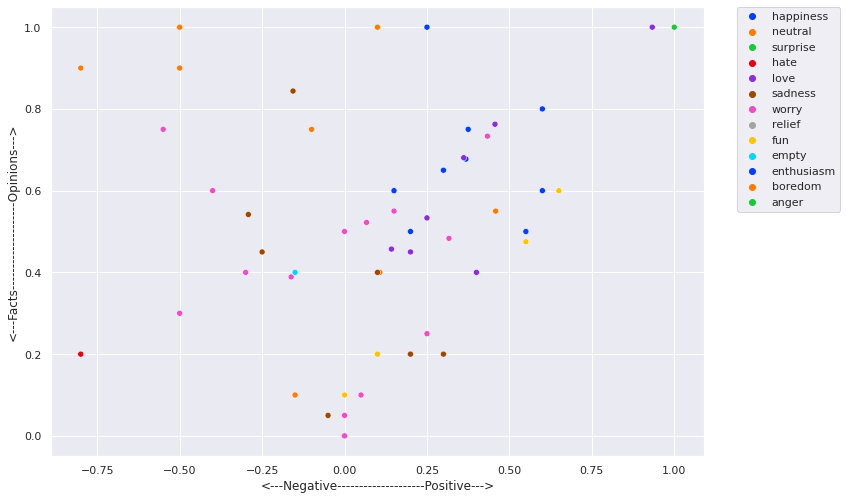

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.scatterplot(x = x["polarity"][:100],y = x["subjectivity"][:100],hue=y,palette="bright")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel("<---Negative--------------------Positive--->")
plt.ylabel("<---Facts--------------------Opinions--->")

# **Plot to visualize polarity and subjectivity of first 100 datapoints**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


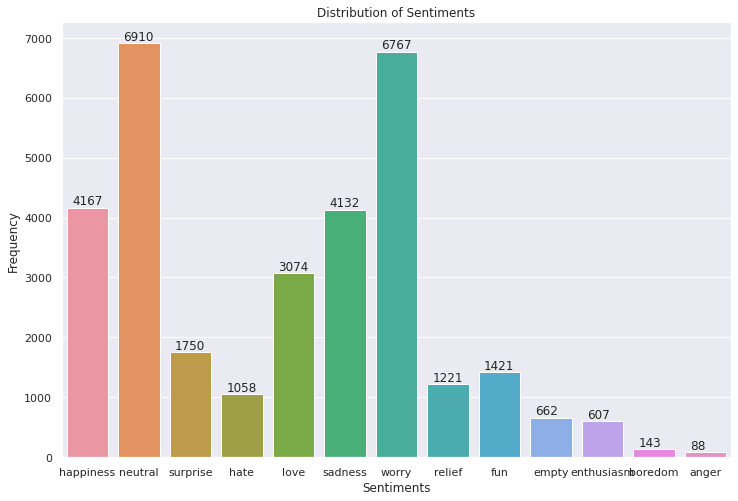

In [15]:
plt.figure(figsize=(12,8))
ax = sns.countplot(y)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

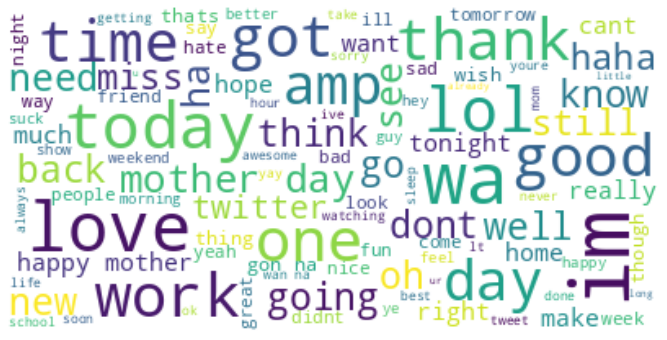

In [16]:
from wordcloud import WordCloud
text = data.iloc[:,0]
wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(text))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# ***wordcloud to see most common words***

In [17]:
from sklearn.preprocessing import LabelEncoder
'''
To encode target classes
'''
enc = LabelEncoder()
y = enc.fit_transform(y)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [19]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:45:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [20]:
y_pred = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

In [21]:
from sklearn.metrics import accuracy_score
print("Testing accuracy - ",accuracy_score(y_pred,y_test))
print("Training accuracy - ",accuracy_score(y_train_pred,y_train))



Testing accuracy -  0.28708333333333336
Training accuracy -  0.3773214285714286


*Testing and training accuracy both are very low which signifies that data is not sufficient to classify each data point correctly roughly 1/4 of the entire test dataset which is 2,400 data points are classified correctly out of 9,600.*

To improve the accuracy we can make Tfidf vectors but this will substaintially increase training time as the size of dataset will also increase, after applying tfidf vectorizer I was getting around 27,000 columns. In order to decrease the size of attributes I decided to apply a constraint called as **min_df = 0.00007** which only selects those words which have document frequency higher than that of **min_df**. Also there are some other arguments like stop_words, which again checks for stopwords present in the string and max_features which gives **15,000** most relevant features in this case.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(stop_words="english",max_features=15000,min_df=0.00007)
data_cv = cv.fit_transform(data["text"])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aah,aampe,aaron,ab,abandoned,abandoning,abby,ability,abit,able,...,zac,zach,zachary,zealand,zero,zoe,zombie,zone,zoo,zune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
data_dtm["polarity"] = x["polarity"]
data_dtm["subjectivity"] = x["subjectivity"]

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
x_train,x_test,y_train,y_test = train_test_split(data_dtm,y,test_size = 0.3)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
y_pred = clf.predict(x_test)
y_train_pred  = clf.predict(x_train)

In [26]:
print("Testing Accuracy - ",accuracy_score(y_pred,y_test))
print("Training Accuracy - ",accuracy_score(y_train_pred,y_train))

Testing Accuracy -  0.325625
Training Accuracy -  0.9636160714285714


After applying random forest classifier which took like 3 - 5 minutes to fit the entire dataset of shape (32000,6475). Testing accuracy is improved by 6% while training accuracy is 96% which means RandomForestClassifier overfits the dataset. This may happen due to number of reasons, the ones that seems obvious are-

**1. Some of the data in the dataset is wrongly classified.**

**2. The are too many target classes for classification.**

 **3. More Data cleaning is required for example - we can remove typos with the correct word and remove useless datapoints but it is very hard to distinguish useless data from useful data.**

> *We can certainly remove typos but it will be computationally heavy and will take more than 5-10 minutes to go through entire dataset which is why it is not done.*